##### IMPORT NECESSARY LIBRARIES

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage

##### LOAD THE DATASET

In [27]:
# Load the dataset
data = pd.read_csv('Retail and warehouse Sale.csv')

##### EXPLORATORY DATA ANALYSIS (EDA)

In [29]:
# Explore the dataset
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [30]:
data.shape

(30000, 9)

In [31]:
# Check for the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


In [32]:
data.describe(include = 'all')

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29967,30000,30000,30000,29999.000000,30000.000000,30000.000000
unique,NaN,NaN,290,15668,15732,8,NaN,NaN,NaN
top,NaN,NaN,"THE COUNTRY VINTNER, LLC DBA WINEBOW",13811,LINGANORE BLACK RAVEN - 750ML,WINE,NaN,NaN,NaN
freq,NaN,NaN,2041,4,5,18680,NaN,NaN,NaN
mean,2020.0,3.911467,NaN,NaN,NaN,NaN,6.939796,6.594058,27.431031
std,0.0,2.836788,NaN,NaN,NaN,NaN,33.081054,27.879428,272.166085
min,2020.0,1.000000,NaN,NaN,NaN,NaN,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,2020.0,3.000000,NaN,NaN,NaN,NaN,0.160000,0.000000,1.000000
75%,2020.0,7.000000,NaN,NaN,NaN,NaN,2.920000,3.000000,6.000000


##### DATA PREPROCESSING

In [34]:
# Check for any null values in the dataset
print("\nMissing values before imputation:")
print(data.isnull().sum())


Missing values before imputation:
YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64


##### MISSING VALUES 

In [36]:
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

In [37]:
# Handling missing values using numerical imputation
num_imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

In [38]:
data[numerical_cols] 

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020.0,1.0,0.00,0.0,2.0
1,2020.0,1.0,0.00,1.0,4.0
2,2020.0,1.0,0.00,0.0,1.0
3,2020.0,1.0,0.00,0.0,1.0
4,2020.0,1.0,0.82,0.0,0.0
...,...,...,...,...,...
29995,2020.0,3.0,0.33,0.0,0.0
29996,2020.0,3.0,0.00,0.0,0.0
29997,2020.0,3.0,0.00,0.0,6.0
29998,2020.0,3.0,329.04,302.0,0.0


In [39]:
# Handling missing values using categorical imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

In [40]:
data[categorical_cols]

,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE
0,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE
1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE
2,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER
3,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE
4,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE
...,...,...,...,...
29995,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR
29996,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE
29997,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE
29998,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR


In [41]:
# Confirm there are no more missing values
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64


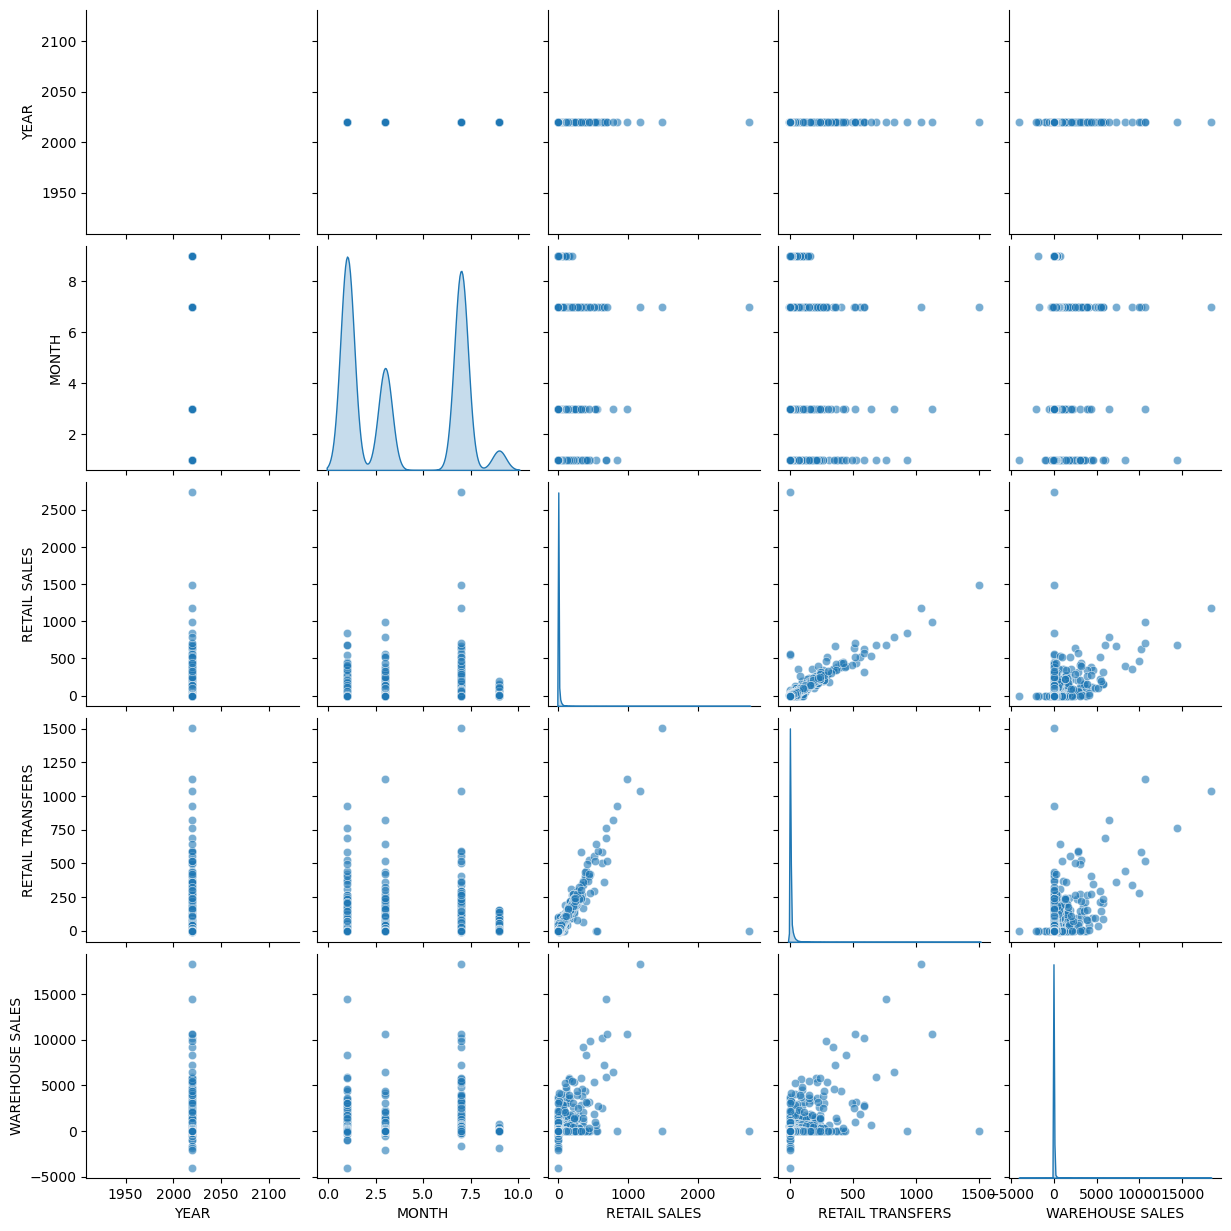

In [42]:
# Visualize distributions of numerical features
sns.pairplot(data[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()

##### ONE-HOT ENCODING

In [44]:
# Convert categorical columns to numerical values using one-hot encoding
#categorical_columns = data.select_dtypes(include=['object']).columns
#data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
# Display the first few rows of the transformed data
#data_encoded.head()

##### LABEL ENCODING

In [46]:
# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [47]:
# Print encoded categorical columns
print("\nEncoded Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")


Encoded Categorical Columns:
SUPPLIER: [194 188 192 129  59 126 208  30 118 114 103  16 153 246 199 231  68 210
 205 109   3  35 177 184  15 286 263  38 133 277  39  63 117  31 187 267
 253  72 136  20 186 223  58 168 150  13  91 259 257  48 216  66 272 204
 115 137 159  50 149 281 113  10  28 256  56 265 196   0  99  57 142 238
  67  17 163 176  18 104  47 120 234  69  65 261 179 260  26  62 268 262
 130 212 175   9 151 125  71 247  86 237 214  55 193  41   5 152 122  80
 182  61  77 244 248   6 241 106 183 116 154 215 169 156   8 158  52 171
 230 245 127  97  19  82 144  33  36  85  89 162  53 140 161  88 189 100
 240 220  12  90  37  76   4  83 287 251  93  74 242 224 141 146 203 249
 105 228  45  44 266  54 225  22  23 243  25 232 275 111  40 284 289 206
  98 222 165 211  94 148 250  70  34  84 180 170 252 239 178  73 131 197
 258 271   2 278  79 181 190 145 273 213 173 124 198 280 282  81  78 201
  49 233 132 195 226  87 255 185  14 110 274   7 107 172  21  46 207  95
 139 112 26

##### STANDARDIZATION

In [49]:
# Feature Scaling
# Standardize the features before clustering 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_cols])

##### PRINCIPAL COMPONENT ANALYSIS (PCA)

In [51]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
print("Explained Variance Ratio by PCA Components:", pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

Explained Variance Ratio by PCA Components: [0.56655241 0.24984995]


0.816402368143885

##### CLUSTERING ALGORITHMS

##### K-MEANS

##### NUMBER OF CLUSTERS USING THE ELBOW METHOD

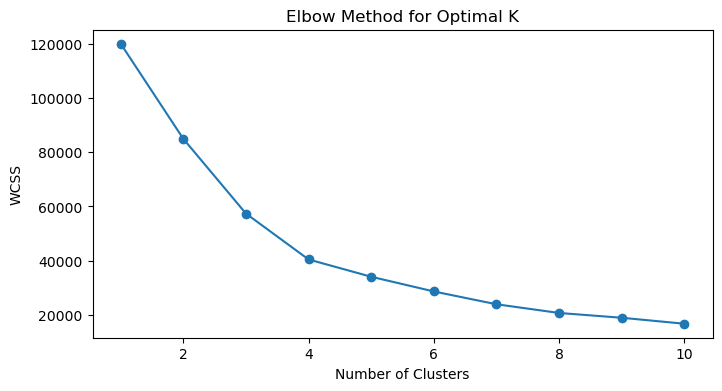

In [55]:
# Elbow method to find optimal number of clusters for KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
# Clustering Algorithm 1 - KMeans
# Use optimal clusters for KMeans based on elbow method
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
kmeans_centroids = kmeans.cluster_centers_
data['KMeans_Cluster'] = kmeans_labels


In [57]:
# Display clustering results
print("KMeans Clustering Results:")
print(data['KMeans_Cluster'].value_counts())

KMeans Clustering Results:
KMeans_Cluster
0    29472
2      503
1       25
Name: count, dtype: int64


##### SILHOUETTE SCORE

In [59]:
# Calculate silhouette score for KMeans
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
print(f"Silhouette Score for KMeans: {kmeans_silhouette:.2f}")

Silhouette Score for KMeans: 0.80


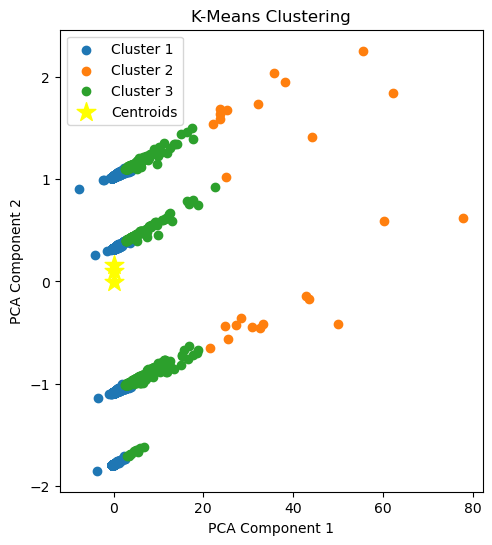

In [60]:
# Visualization for KMeans clustering
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(data_pca[kmeans_labels == i, 0], data_pca[kmeans_labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='yellow', marker='*', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


##### AGGLOMERATIVE CLUSTERING

##### NUMBER OF CLUSTERS USING THE DENDROGRAM

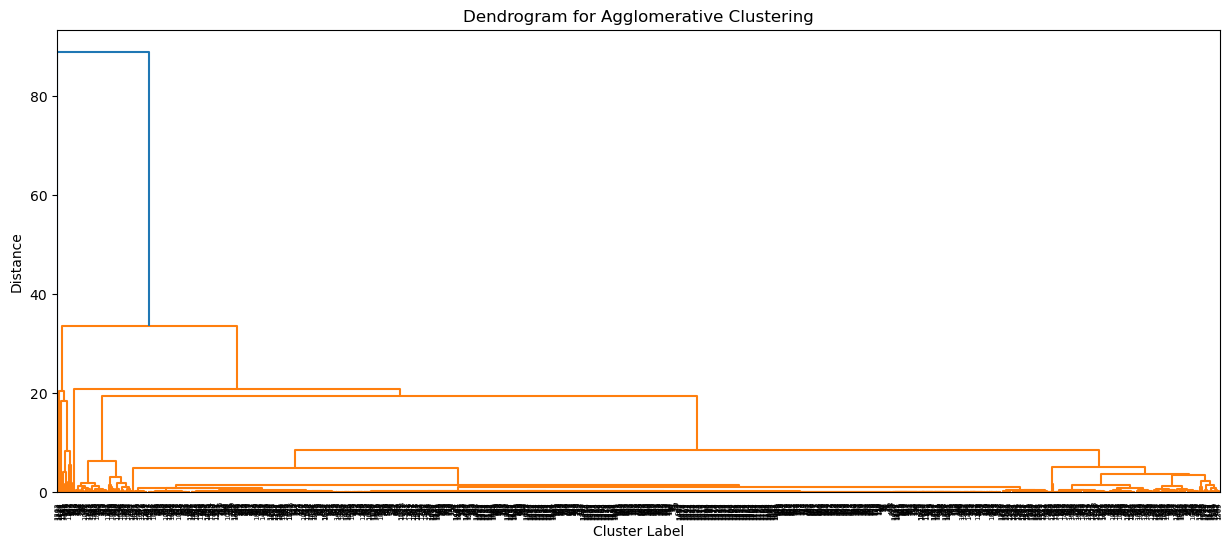

In [63]:
# Dendrogram for Agglomerative Clustering
max_samples = 1500  
sample_data = data_scaled[:max_samples] if data_scaled.shape[0] > max_samples else data_scaled
linked = linkage(sample_data, method='ward')
plt.figure(figsize=(15, 6))
dendrogram(linked)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Cluster Label')
plt.ylabel('Distance')
plt.show()


In [64]:
# Clustering Algorithm 2 - Agglomerative Clustering
# Agglomerative Clustering with optimal number of clusters
optimal_k = 3 
agg_cluster = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_cluster.fit_predict(data_scaled)
agg_centroids = np.array([data_pca[agg_labels == i].mean(axis=0) for i in range(agg_cluster.n_clusters)])
data['Agg_Cluster'] = agg_labels


In [65]:
# Display clustering results
print("\nAgglomerative Clustering Results:")
print(data['Agg_Cluster'].value_counts())


Agglomerative Clustering Results:
Agg_Cluster
1    17630
2    12100
0      270
Name: count, dtype: int64


##### SILHOUETTE SCORE

In [67]:
# Calculate silhouette score for Agglomerative Clustering
agg_silhouette = silhouette_score(data_scaled, agg_labels)
print(f"Silhouette Score for Agglomerative Clustering: {agg_silhouette:.2f}")

Silhouette Score for Agglomerative Clustering: 0.70


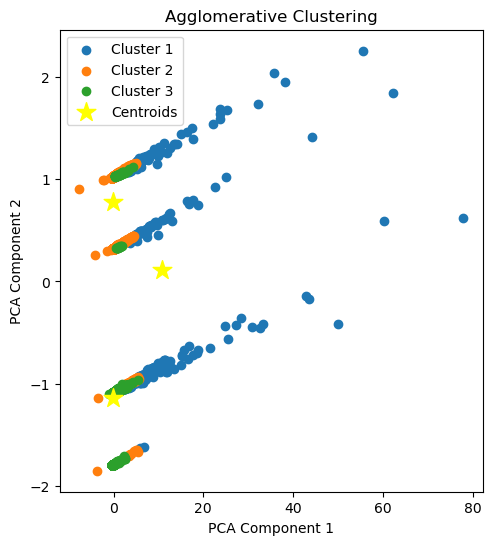

In [68]:
# Visualization for Agglomerative Clustering
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
for i in range(3): 
    plt.scatter(data_pca[agg_labels == i, 0], data_pca[agg_labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(agg_centroids[:, 0], agg_centroids[:, 1], c='yellow', marker='*', s=200, label='Centroids')
plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()